# Libraries

In [1]:
!pip install geopandas
!pip install topojson
!pip install simplification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
import json
import topojson as tp
from shapely.wkb import loads, dumps
from urllib.request import urlopen
from sys import getsizeof


# Data

## Importing Predictions Data

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data

,BEVDICHTE_SQKM_2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_2019,ALTERSVERTEILUNG_ANTEIL_20_64_2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_2019,PRIVATHAUSHALTE_2019,GESAMTFLAECHE_SQKM_2016,LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004,WALD_GEHOELZE_ANTEIL_2004,UNPRODUKTIVE_FLAECHE_ANTEIL_2004,...,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,ANZAHL_FILIALEN_MIGROS,GMDNAME,linregModel,knnModel,rfModel,xgbrModel,ensemble
0,453.711133,15.839505,20.404554,60.362551,19.232895,3908.0,19.94,53.386854,27.997993,0.501756,...,68464.601333,6014.000001,9.0,1.0,Aadorf,1.0,1.0,1.0,1.0,1.0
1,1764.424635,20.938777,17.383916,64.414642,18.201442,10591.0,12.34,11.407767,32.281553,7.119741,...,72516.345149,10976.000000,51.0,4.0,Aarau,5.0,5.0,5.0,4.0,5.0
2,584.110971,12.888601,19.624352,59.045769,21.329879,2146.0,7.93,44.206549,29.722922,2.644836,...,64687.799155,2807.999999,11.0,0.0,Aarberg,1.0,1.0,1.0,1.0,1.0
3,1899.319728,44.138013,20.475167,65.222063,14.302770,3735.0,4.41,19.318182,31.136364,3.863636,...,60540.820872,4758.000002,10.0,1.0,Aarburg,2.0,1.0,2.0,1.0,2.0
4,466.666667,15.909091,20.541126,60.129870,19.329004,1962.0,9.90,45.795339,35.967579,3.242148,...,65314.566285,2699.000000,4.0,1.0,Aarwangen,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,534.225195,12.583472,21.222871,60.976628,17.800501,1969.0,8.97,54.849498,23.745819,1.449275,...,80012.956811,3202.000000,9.0,2.0,Zuzwil (SG),1.0,0.0,0.0,1.0,0.0
2138,41.643836,13.190789,16.973684,56.842105,26.184211,1385.0,73.00,54.853705,33.716161,8.025704,...,58806.567631,1793.000000,29.0,1.0,Zweisimmen,0.0,0.0,0.0,0.0,0.0
2139,133.739837,4.863222,27.051672,56.534954,16.413374,125.0,2.46,62.962963,26.337449,0.823045,...,62723.214286,178.000000,1.0,0.0,Zwieselberg,-0.0,0.0,0.0,0.0,0.0
2140,532.104122,24.419079,20.423971,64.329393,15.246637,1057.0,4.61,33.043478,38.478261,2.826087,...,67304.796663,1612.000000,7.0,1.0,Zwingen,1.0,0.0,0.0,0.0,0.0


## Downloading Geo Data of Swiss Municipalities

In [5]:
with urlopen('https://datahub.io/cividi/ch-municipalities/r/gemeinden-geojson.geojson') as response:
    json_data = json.load(response)
    gdf_data = gpd.GeoDataFrame.from_features(json_data)

In [6]:
gdf_data

,geometry,gemeinde.BFS_NUMMER,gemeinde.NAME,kanton.KUERZEL,kanton.NAME
0,"MULTIPOLYGON Z (((8.50388 47.27308 720.72250, ...",1,Aeugst am Albis,ZH,Zürich
1,"MULTIPOLYGON Z (((8.41466 47.29360 463.84375, ...",2,Affoltern am Albis,ZH,Zürich
2,"MULTIPOLYGON Z (((8.44132 47.31583 579.46875, ...",3,Bonstetten,ZH,Zürich
3,"MULTIPOLYGON Z (((8.57437 47.21707 545.69750, ...",4,Hausen am Albis,ZH,Zürich
4,"MULTIPOLYGON Z (((8.43621 47.31520 609.31500, ...",5,Hedingen,ZH,Zürich
...,...,...,...,...,...
2170,"MULTIPOLYGON Z (((7.15253 47.43921 475.01250, ...",6806,Vendlincourt,JU,Jura
2171,"MULTIPOLYGON Z (((7.06857 47.45004 469.61625, ...",6807,Basse-Allaine,JU,Jura
2172,"MULTIPOLYGON Z (((7.19091 47.34843 792.55250, ...",6808,Clos du Doubs,JU,Jura
2173,"MULTIPOLYGON Z (((6.95743 47.40529 569.20625, ...",6809,Haute-Ajoie,JU,Jura


## Turing 3D Geo Data into 2D for performance & file size

In [7]:
gdf_data.geometry = gdf_data.geometry.apply(lambda x: loads(dumps(x, output_dimension=2)))
gdf_data

,geometry,gemeinde.BFS_NUMMER,gemeinde.NAME,kanton.KUERZEL,kanton.NAME
0,"MULTIPOLYGON (((8.50388 47.27308, 8.50344 47.2...",1,Aeugst am Albis,ZH,Zürich
1,"MULTIPOLYGON (((8.41466 47.29360, 8.41496 47.2...",2,Affoltern am Albis,ZH,Zürich
2,"MULTIPOLYGON (((8.44132 47.31583, 8.44132 47.3...",3,Bonstetten,ZH,Zürich
3,"MULTIPOLYGON (((8.57437 47.21707, 8.57434 47.2...",4,Hausen am Albis,ZH,Zürich
4,"MULTIPOLYGON (((8.43621 47.31520, 8.43632 47.3...",5,Hedingen,ZH,Zürich
...,...,...,...,...,...
2170,"MULTIPOLYGON (((7.15253 47.43921, 7.15221 47.4...",6806,Vendlincourt,JU,Jura
2171,"MULTIPOLYGON (((7.06857 47.45004, 7.06791 47.4...",6807,Basse-Allaine,JU,Jura
2172,"MULTIPOLYGON (((7.19091 47.34843, 7.19060 47.3...",6808,Clos du Doubs,JU,Jura
2173,"MULTIPOLYGON (((6.95743 47.40529, 6.95836 47.4...",6809,Haute-Ajoie,JU,Jura


## Renaming Cities

Some Swiss municipalities have the same name (e.g. the city "Aesch" exits in 3 different catons BL, LU, ZH). In our predictions dataset, we differentiate between them by combining the city & canton names (e.g. "Aesch (BL)", "Aesch (LU), and "Aesch (ZH)"). We have to do the same in the GEO dataset:

In [8]:
city_occurences = gdf_data["gemeinde.NAME"].value_counts()
gdf_data["gemeinde.NAME"] = gdf_data.apply(lambda x: "{0} ({1})".format(x["gemeinde.NAME"], x["kanton.KUERZEL"]) if (city_occurences[x["gemeinde.NAME"]] > 1) else x["gemeinde.NAME"], axis=1)
gdf_data

,geometry,gemeinde.BFS_NUMMER,gemeinde.NAME,kanton.KUERZEL,kanton.NAME
0,"MULTIPOLYGON (((8.50388 47.27308, 8.50344 47.2...",1,Aeugst am Albis,ZH,Zürich
1,"MULTIPOLYGON (((8.41466 47.29360, 8.41496 47.2...",2,Affoltern am Albis,ZH,Zürich
2,"MULTIPOLYGON (((8.44132 47.31583, 8.44132 47.3...",3,Bonstetten,ZH,Zürich
3,"MULTIPOLYGON (((8.57437 47.21707, 8.57434 47.2...",4,Hausen am Albis,ZH,Zürich
4,"MULTIPOLYGON (((8.43621 47.31520, 8.43632 47.3...",5,Hedingen,ZH,Zürich
...,...,...,...,...,...
2170,"MULTIPOLYGON (((7.15253 47.43921, 7.15221 47.4...",6806,Vendlincourt,JU,Jura
2171,"MULTIPOLYGON (((7.06857 47.45004, 7.06791 47.4...",6807,Basse-Allaine,JU,Jura
2172,"MULTIPOLYGON (((7.19091 47.34843, 7.19060 47.3...",6808,Clos du Doubs,JU,Jura
2173,"MULTIPOLYGON (((6.95743 47.40529, 6.95836 47.4...",6809,Haute-Ajoie,JU,Jura


## Merging Geo & Prediction Data

In [9]:
geo_df = gdf_data.merge(data, left_on="gemeinde.NAME", right_on="GMDNAME").set_index("gemeinde.NAME")
geo_df

,geometry,gemeinde.BFS_NUMMER,kanton.KUERZEL,kanton.NAME,BEVDICHTE_SQKM_2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_2019,ALTERSVERTEILUNG_ANTEIL_20_64_2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_2019,PRIVATHAUSHALTE_2019,...,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,ANZAHL_FILIALEN_MIGROS,GMDNAME,linregModel,knnModel,rfModel,xgbrModel,ensemble
gemeinde.NAME,,,,,,,,,,,,,,,,,,,,,
Aeugst am Albis,"MULTIPOLYGON (((8.50388 47.27308, 8.50344 47.2...",1,ZH,Zürich,250.442478,14.184755,19.787986,62.190813,18.021201,848.0,...,105013.570634,1222.000000,6.0,0.0,Aeugst am Albis,0.0,0.0,0.0,0.0,0.0
Affoltern am Albis,"MULTIPOLYGON (((8.41466 47.29360, 8.41496 47.2...",2,ZH,Zürich,1161.756374,28.700317,20.165813,61.667886,18.166301,5412.0,...,71059.805603,6367.999998,14.0,3.0,Affoltern am Albis,2.0,2.0,2.0,1.0,2.0
Bonstetten,"MULTIPOLYGON (((8.44132 47.31583, 8.44132 47.3...",3,ZH,Zürich,749.932705,16.564968,23.636037,59.834889,16.529074,2327.0,...,88927.698145,2776.000000,8.0,1.0,Bonstetten,0.0,1.0,0.0,1.0,0.0
Hausen am Albis,"MULTIPOLYGON (((8.57437 47.21707, 8.57434 47.2...",4,ZH,Zürich,275.808824,16.022394,22.180752,59.824047,17.995201,1552.0,...,86300.455137,2144.000000,10.0,0.0,Hausen am Albis,0.0,0.0,0.0,0.0,0.0
Hedingen,"MULTIPOLYGON (((8.43621 47.31520, 8.43632 47.3...",5,ZH,Zürich,578.560490,16.410799,21.625199,61.646374,16.728428,1580.0,...,90811.205330,1980.000000,3.0,0.0,Hedingen,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,"MULTIPOLYGON (((7.15253 47.43921, 7.15221 47.4...",6806,JU,Jura,61.092896,7.155635,18.425760,56.887299,24.686941,238.0,...,51792.765957,354.000000,2.0,0.0,Vendlincourt,-0.0,0.0,0.0,0.0,0.0
Basse-Allaine,"MULTIPOLYGON (((7.06857 47.45004, 7.06791 47.4...",6807,JU,Jura,53.732639,9.127625,21.728595,52.988691,25.282714,538.0,...,55070.841487,782.000000,12.0,0.0,Basse-Allaine,0.0,0.0,0.0,0.0,0.0
Clos du Doubs,"MULTIPOLYGON (((7.19091 47.34843, 7.19060 47.3...",6808,JU,Jura,20.453441,7.284244,18.289786,56.611243,25.098971,585.0,...,50267.857143,854.000000,20.0,0.0,Clos du Doubs,0.0,0.0,0.0,0.0,0.0


Unfortunately, not all municipalities of our dataset were included in the geo dataset. Therefore, we lost the following municipalities:

In [10]:
data[~data.GMDNAME.isin(list(geo_df.index))].sort_index()

,BEVDICHTE_SQKM_2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_2019,ALTERSVERTEILUNG_ANTEIL_20_64_2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_2019,PRIVATHAUSHALTE_2019,GESAMTFLAECHE_SQKM_2016,LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004,WALD_GEHOELZE_ANTEIL_2004,UNPRODUKTIVE_FLAECHE_ANTEIL_2004,...,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,ANZAHL_FILIALEN_MIGROS,GMDNAME,linregModel,knnModel,rfModel,xgbrModel,ensemble
18,229.379562,7.955449,16.149562,63.484487,20.365951,570.0,5.48,64.140481,19.963031,3.881701,...,70557.980456,873.000000,6.0,0.0,Aeschi (SO),0.0,0.0,0.0,0.0,0.0
41,934.084231,16.294432,19.523959,59.735766,20.740275,4200.0,10.21,34.249264,39.450442,1.766438,...,66257.105389,5733.000001,22.0,1.0,Altdorf (UR),1.0,2.0,2.0,2.0,2.0
56,316.798732,6.203102,26.313157,57.328664,16.358179,762.0,6.31,66.082803,20.382166,1.592357,...,74719.921363,1231.000000,4.0,0.0,Andwil (SG),0.0,0.0,0.0,0.0,0.0
85,1679.354839,35.548726,19.259828,61.915738,18.824433,3528.0,4.65,36.695279,4.506438,6.652361,...,64778.258276,6053.999998,9.0,1.0,Au (SG),2.0,1.0,1.0,1.0,1.0
140,12.135922,7.272727,22.545455,55.272727,22.181818,103.0,22.66,43.606702,54.144621,0.352734,...,52781.553398,199.000000,7.0,0.0,Beinwil (SO),-0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,1486.615110,25.994398,19.771909,62.717087,17.511004,10831.0,16.81,38.912134,16.497310,13.209803,...,68356.142765,13023.000003,36.0,3.0,Wetzikon (ZH),3.0,4.0,4.0,3.0,4.0
2068,1120.444444,13.010710,24.910750,60.015867,15.073384,991.0,2.25,52.444444,19.555556,4.444444,...,75382.934132,1374.000000,7.0,0.0,Wilen (TG),0.0,0.0,0.0,0.0,0.0
2081,90.396660,6.697460,20.092379,63.279446,16.628176,188.0,4.79,54.054054,39.916840,0.000000,...,71552.777778,277.000000,3.0,0.0,Wisen (SO),-0.0,0.0,0.0,0.0,0.0
2086,1331.169872,39.426955,20.471920,61.319449,18.208632,7072.0,12.48,38.072289,27.791165,0.481928,...,65549.458426,9790.999999,65.0,1.0,Wohlen (AG),3.0,2.0,3.0,2.0,2.0


## Turning Float into Int

In [11]:
geo_df[["ANZAHL_FILIALEN_MIGROS", "linregModel", "knnModel", "rfModel", "xgbrModel", "ensemble"]] = geo_df[["ANZAHL_FILIALEN_MIGROS", "linregModel", "knnModel", "rfModel", "xgbrModel", "ensemble"]].astype(int)
geo_df

,geometry,gemeinde.BFS_NUMMER,kanton.KUERZEL,kanton.NAME,BEVDICHTE_SQKM_2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_2019,ALTERSVERTEILUNG_ANTEIL_20_64_2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_2019,PRIVATHAUSHALTE_2019,...,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,ANZAHL_FILIALEN_MIGROS,GMDNAME,linregModel,knnModel,rfModel,xgbrModel,ensemble
gemeinde.NAME,,,,,,,,,,,,,,,,,,,,,
Aeugst am Albis,"MULTIPOLYGON (((8.50388 47.27308, 8.50344 47.2...",1,ZH,Zürich,250.442478,14.184755,19.787986,62.190813,18.021201,848.0,...,105013.570634,1222.000000,6.0,0,Aeugst am Albis,0,0,0,0,0
Affoltern am Albis,"MULTIPOLYGON (((8.41466 47.29360, 8.41496 47.2...",2,ZH,Zürich,1161.756374,28.700317,20.165813,61.667886,18.166301,5412.0,...,71059.805603,6367.999998,14.0,3,Affoltern am Albis,2,2,2,1,2
Bonstetten,"MULTIPOLYGON (((8.44132 47.31583, 8.44132 47.3...",3,ZH,Zürich,749.932705,16.564968,23.636037,59.834889,16.529074,2327.0,...,88927.698145,2776.000000,8.0,1,Bonstetten,0,1,0,1,0
Hausen am Albis,"MULTIPOLYGON (((8.57437 47.21707, 8.57434 47.2...",4,ZH,Zürich,275.808824,16.022394,22.180752,59.824047,17.995201,1552.0,...,86300.455137,2144.000000,10.0,0,Hausen am Albis,0,0,0,0,0
Hedingen,"MULTIPOLYGON (((8.43621 47.31520, 8.43632 47.3...",5,ZH,Zürich,578.560490,16.410799,21.625199,61.646374,16.728428,1580.0,...,90811.205330,1980.000000,3.0,0,Hedingen,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,"MULTIPOLYGON (((7.15253 47.43921, 7.15221 47.4...",6806,JU,Jura,61.092896,7.155635,18.425760,56.887299,24.686941,238.0,...,51792.765957,354.000000,2.0,0,Vendlincourt,0,0,0,0,0
Basse-Allaine,"MULTIPOLYGON (((7.06857 47.45004, 7.06791 47.4...",6807,JU,Jura,53.732639,9.127625,21.728595,52.988691,25.282714,538.0,...,55070.841487,782.000000,12.0,0,Basse-Allaine,0,0,0,0,0
Clos du Doubs,"MULTIPOLYGON (((7.19091 47.34843, 7.19060 47.3...",6808,JU,Jura,20.453441,7.284244,18.289786,56.611243,25.098971,585.0,...,50267.857143,854.000000,20.0,0,Clos du Doubs,0,0,0,0,0


## Dropping some unneeded columns

In [12]:
geo_df.drop(["gemeinde.BFS_NUMMER", "kanton.KUERZEL", "kanton.NAME"], axis=1, inplace=True)
geo_df

## Simplifying Municipalities Geo Shapes to improve performance & save space

In [13]:
gdf_simplified1 = tp.Topology(geo_df.reset_index(level=0), topology=True, toposimplify=0.001).to_gdf().set_index("gemeinde.NAME")
gdf_simplified2 = tp.Topology(geo_df.reset_index(level=0), topology=True, toposimplify=0.002).to_gdf().set_index("gemeinde.NAME")
gdf_simplified1

/usr/local/lib/python3.7/dist-packages/topojson/core/extract.py:332: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for ring in geom:
/usr/local/lib/python3.7/dist-packages/topojson/core/extract.py:301: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lst_idx = list(range(idx_ls, idx_ls + len(list(boundary))))
/usr/local/lib/python3.7/dist-packages/topojson/core/extract.py:301: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  lst_idx = list(range(idx_ls, idx_ls + len(list(boundary))))
/usr/local/lib/python3.7/dist-packages/to

,geometry,BEVDICHTE_SQKM_2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_2019,ALTERSVERTEILUNG_ANTEIL_20_64_2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_2019,PRIVATHAUSHALTE_2019,GESAMTFLAECHE_SQKM_2016,LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004,WALD_GEHOELZE_ANTEIL_2004,...,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,ANZAHL_FILIALEN_MIGROS,GMDNAME,linregModel,knnModel,rfModel,xgbrModel,ensemble
gemeinde.NAME,,,,,,,,,,,,,,,,,,,,,
Aeugst am Albis,"MULTIPOLYGON (((8.50388 47.27308, 8.50855 47.2...",250.442478,14.184755,19.787986,62.190813,18.021201,848.0,7.91,51.139241,30.886076,...,105013.570634,1222.000000,6.0,0,Aeugst am Albis,0,0,0,0,0
Affoltern am Albis,"MULTIPOLYGON (((8.41466 47.29360, 8.41653 47.2...",1161.756374,28.700317,20.165813,61.667886,18.166301,5412.0,10.59,40.170940,28.205128,...,71059.805603,6367.999998,14.0,3,Affoltern am Albis,2,2,2,1,2
Bonstetten,"MULTIPOLYGON (((8.44132 47.31583, 8.44679 47.3...",749.932705,16.564968,23.636037,59.834889,16.529074,2327.0,7.43,55.510753,28.629032,...,88927.698145,2776.000000,8.0,1,Bonstetten,0,1,0,1,0
Hausen am Albis,"MULTIPOLYGON (((8.57438 47.21707, 8.57718 47.2...",275.808824,16.022394,22.180752,59.824047,17.995201,1552.0,13.60,55.906090,28.833456,...,86300.455137,2144.000000,10.0,0,Hausen am Albis,0,0,0,0,0
Hedingen,"MULTIPOLYGON (((8.43621 47.31520, 8.43205 47.3...",578.560490,16.410799,21.625199,61.646374,16.728428,1580.0,6.53,46.341463,33.231707,...,90811.205330,1980.000000,3.0,0,Hedingen,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,"MULTIPOLYGON (((7.15253 47.43921, 7.15567 47.4...",61.092896,7.155635,18.425760,56.887299,24.686941,238.0,9.15,55.846995,37.595628,...,51792.765957,354.000000,2.0,0,Vendlincourt,0,0,0,0,0
Basse-Allaine,"MULTIPOLYGON (((7.06857 47.45004, 7.06863 47.4...",53.732639,9.127625,21.728595,52.988691,25.282714,538.0,23.04,44.043478,47.652174,...,55070.841487,782.000000,12.0,0,Basse-Allaine,0,0,0,0,0
Clos du Doubs,"MULTIPOLYGON (((7.19091 47.34843, 7.19991 47.3...",20.453441,7.284244,18.289786,56.611243,25.098971,585.0,61.75,42.884896,52.096487,...,50267.857143,854.000000,20.0,0,Clos du Doubs,0,0,0,0,0


In [14]:
canton = 887

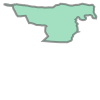

In [15]:
geo_df.iloc[canton].geometry

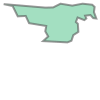

In [16]:
gdf_simplified1.iloc[canton].geometry

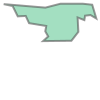

In [17]:
gdf_simplified2.iloc[canton].geometry

In [18]:
print("geo_df size in kb: {}".format(int(getsizeof(geo_df.to_json())/1024)))
print("gdf_simplified1 size in kb: {}".format(int(getsizeof(gdf_simplified1.to_json())/1024)))
print("gdf_simplified2 size in kb: {}".format(int(getsizeof(gdf_simplified2.to_json())/1024)))

geo_df size in kb: 50812
gdf_simplified1 size in kb: 5100
gdf_simplified2 size in kb: 3860


By simplifying the geometries of the municipalities, the overall topology can be preserved while significantly reducing the size (~~13-20x) and improving performance. This also has practival benefits as github only supports files up to 25mb for the free plan.
For our purposes, we selected gdf_simplified1 as a goob balance between size and preservation of shapes/outlines.

In [19]:
fig = px.choropleth_mapbox(gdf_simplified1,
                           geojson=gdf_simplified1.geometry,
                           locations=gdf_simplified1.index,
                           color="ANZAHL_FILIALEN_MIGROS",
                           center={"lat": 46.9, "lon": 8.2275},
                           mapbox_style="open-street-map",
                           zoom=7,
                           color_continuous_scale="Viridis",
                           opacity=0.5,
                           width=1600, height=800)
fig.show()

In [20]:
gdf_simplified1.to_csv("simplified1.csv")